In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.decomposition import PCA

In [43]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Load the training dataset from a CSV file
# The file path is specified as a raw string to avoid issues with backslashes
train = pd.read_csv(r"C:\Users\Zahid.Shaikh\100days\61\train.csv")

# Print the shape of the DataFrame to see the number of rows and columns
print(train.shape)

# Display the DataFrame to inspect its contents
train


(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Save the labels to a Pandas Series named 'target'
target = train['label']

# Drop the label feature from the training dataset as it will not be used for PCA
train = train.drop("label", axis=1)

# Import the StandardScaler class from sklearn for data standardization
from sklearn.preprocessing import StandardScaler

# Convert the training DataFrame to a NumPy array
X = train.values

# Standardize the data by removing the mean and scaling to unit variance
X_std = StandardScaler().fit_transform(X)

# Calculate the mean vector of the standardized data
mean_vec = np.mean(X_std, axis=0)

# Compute the covariance matrix of the standardized data
cov_mat = np.cov(X_std.T)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples for further processing
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the eigenvalue-eigenvector pairs from high to low based on eigenvalues
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Calculate the total sum of eigenvalues
tot = sum(eig_vals)

# Calculate individual explained variance for each principal component
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)] 

# Calculate cumulative explained variance to see the total variance explained by the first k components
cum_var_exp = np.cumsum(var_exp) 


This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



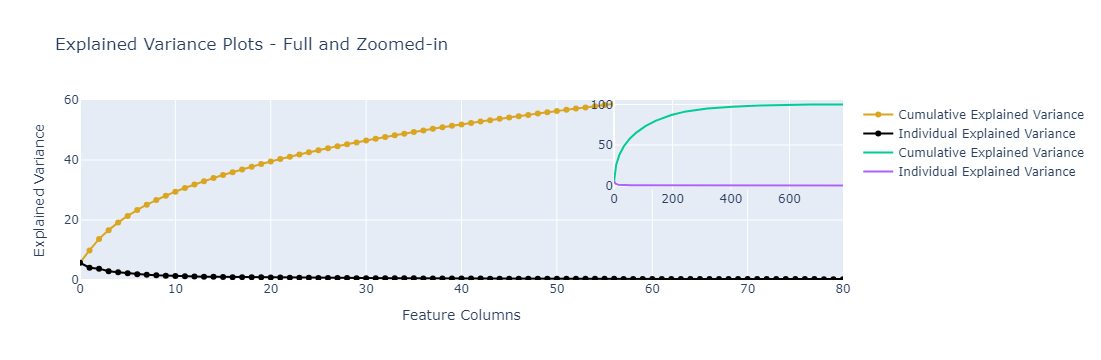

In [49]:
import plotly.graph_objs as go  # Import necessary Plotly graphing library
from plotly.subplots import make_subplots  # Import to create subplots

# Define the first trace for cumulative explained variance
trace1 = go.Scatter(
    x=list(range(784)),  # X-axis values representing feature columns
    y=cum_var_exp,  # Y-axis values representing cumulative explained variance
    mode='lines+markers',  # Display both lines and markers on the plot
    name="Cumulative Explained Variance",  # Name for the legend
    line=dict(
        shape='spline',  # Smooth line shape for better visual representation
        color='goldenrod'  # Set the line color
    )
)

# Define the second trace for individual explained variance
trace2 = go.Scatter(
    x=list(range(784)),  # X-axis values representing feature columns
    y=var_exp,  # Y-axis values representing individual explained variance
    mode='lines+markers',  # Display both lines and markers on the plot
    name="Individual Explained Variance",  # Name for the legend
    line=dict(
        shape='linear',  # Straight line shape for clarity
        color='black'  # Set the line color
    )
)

# Create the figure using make_subplots to enable subplots and insets
fig = make_subplots(
    insets=[{'cell': (1, 1), 'l': 0.7, 'b': 0.5}],  # Define inset layout parameters
    print_grid=True  # Print grid for better visualization
)

# Add the first trace (cumulative explained variance) to the main plot
fig.add_trace(trace1, 1, 1)

# Add the second trace (individual explained variance) to the main plot
fig.add_trace(trace2, 1, 1)

# Configure layout settings for the main plot
fig.update_layout(
    title='Explained Variance Plots - Full and Zoomed-in',  # Set the title of the plot
    xaxis=dict(range=[0, 80], title='Feature Columns'),  # Configure X-axis properties
    yaxis=dict(range=[0, 60], title='Explained Variance'),  # Configure Y-axis properties
)

# Add the cumulative explained variance trace to the inset
fig.add_trace(go.Scatter(
    x=list(range(784)),  # X-axis values for the inset
    y=cum_var_exp,  # Y-axis values for cumulative explained variance
    xaxis='x2',  # Specify which X-axis to use in the inset
    yaxis='y2',  # Specify which Y-axis to use in the inset
    name='Cumulative Explained Variance'  # Name for the inset trace
))

# Add the individual explained variance trace to the inset
fig.add_trace(go.Scatter(
    x=list(range(784)),  # X-axis values for the inset
    y=var_exp,  # Y-axis values for individual explained variance
    xaxis='x2',  # Specify which X-axis to use in the inset
    yaxis='y2',  # Specify which Y-axis to use in the inset
    name='Individual Explained Variance'  # Name for the inset trace
))

# Display the plot
fig.show()


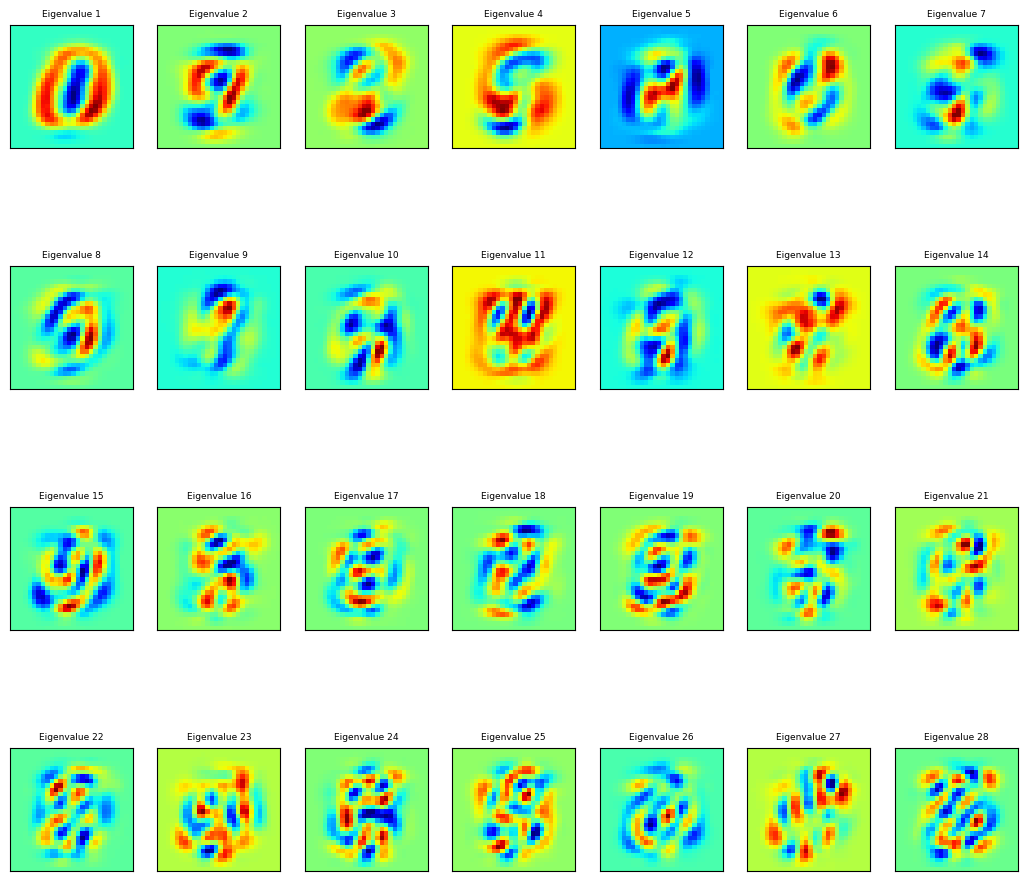

In [23]:
# Invoke SKlearn's PCA method
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
eigenvalues = pca.components_
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

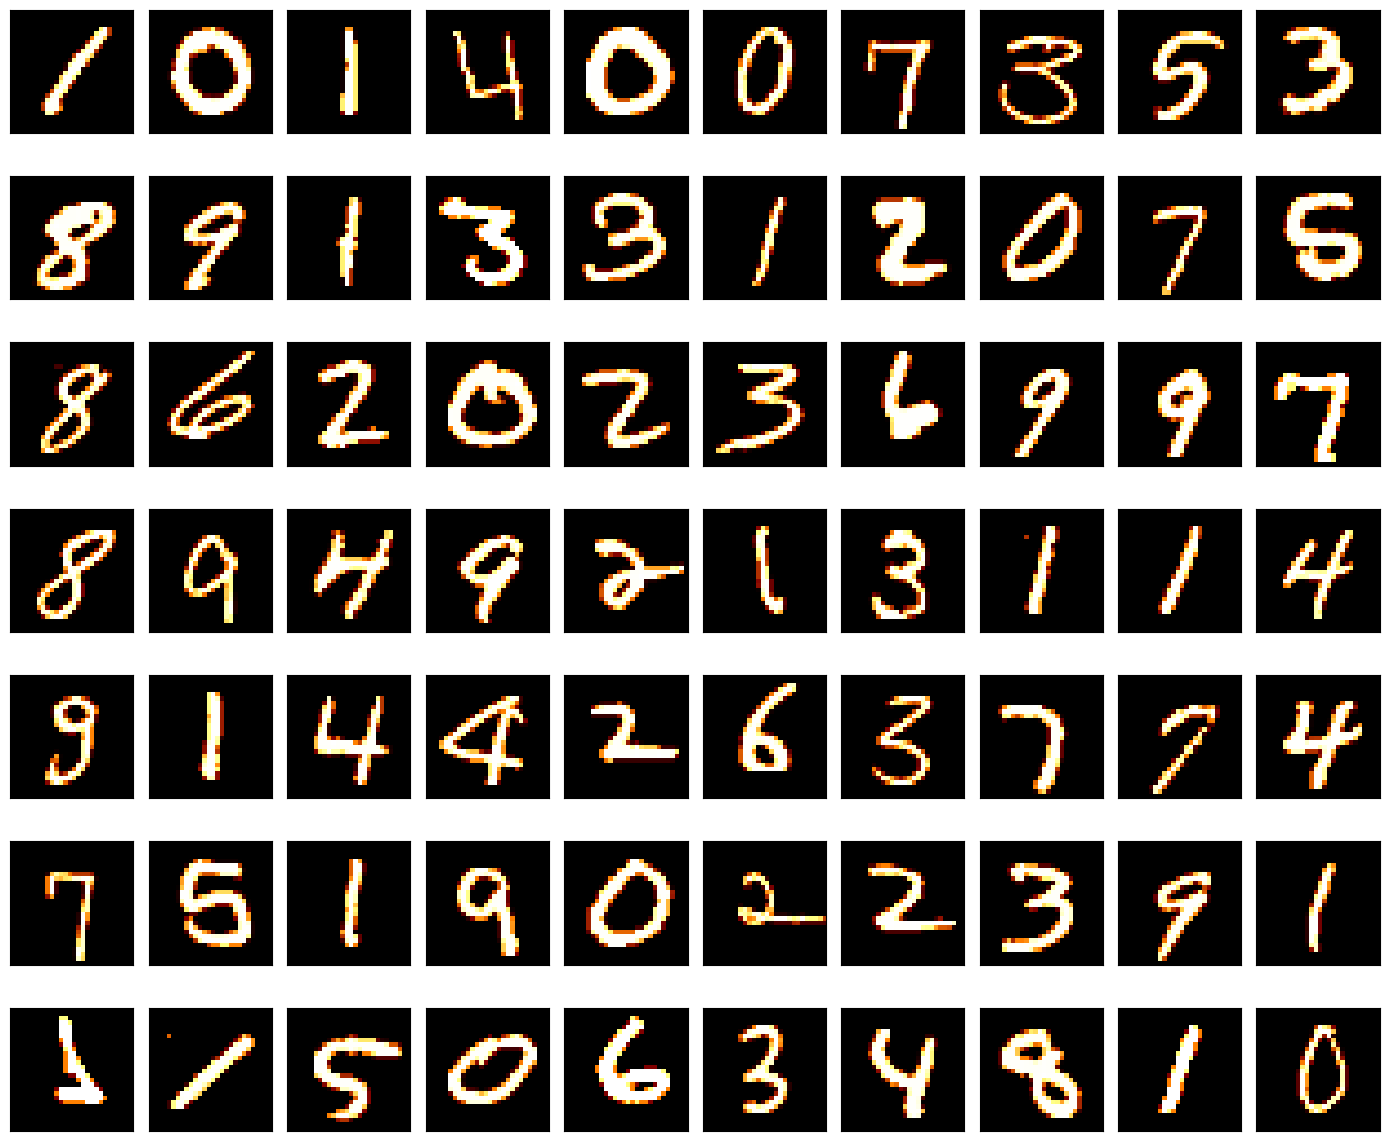

In [30]:
import matplotlib.pyplot as plt

# Plot some of the numbers
plt.figure(figsize=(14,12))
for digit_num in range(0, 70):
    plt.subplot(7, 10, digit_num + 1)
    
    # Convert the row data to a numpy array and reshape it
    grid_data = train.iloc[digit_num].to_numpy().reshape(28, 28)
    
    # Plot the reshaped data as an image
    plt.imshow(grid_data, interpolation="none", cmap="afmhot")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


In [32]:
# Delete our earlier created X object
del X
# Taking only the first N rows to speed things up
X= train[:6000].values
del train
# Standardising the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

# For cluster coloring in our Plotly plots, remember to also restrict the target values 
Target = target[:6000]

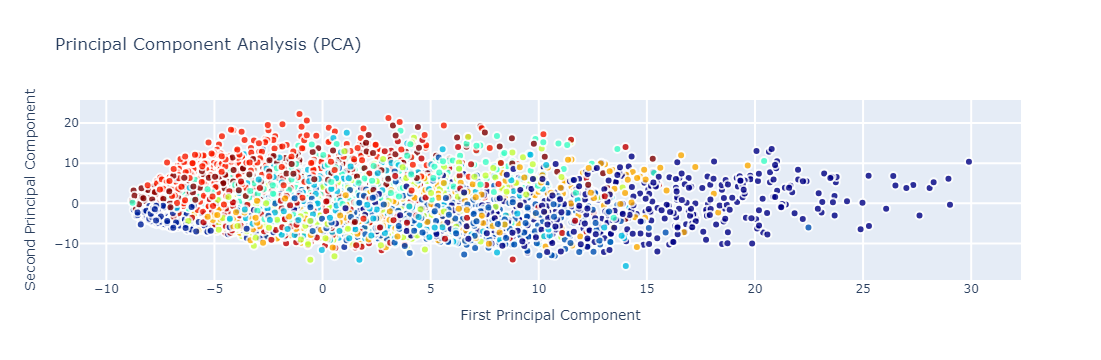

In [41]:
trace0 = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
#     name = Target,
#     hoveron = Target,
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')